In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Source: https://www.blockchain.com/ko/charts/market-price?timespan=60days
file_path = '../data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

# 기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


day        price
360  2018-08-22 00:00:00  6575.229167
361  2018-08-23 00:00:00  6434.881667
362  2018-08-24 00:00:00  6543.645714
363  2018-08-25 00:00:00  6719.429231
364  2018-08-26 00:00:00  6673.274167

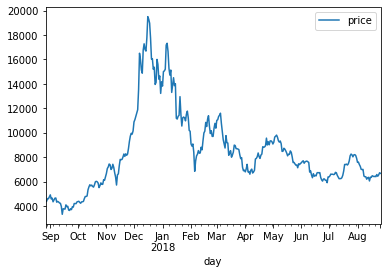

In [3]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index로 설정합니디.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

# 일자별 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

In [4]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [5]:
# (AR=2. 차분(경향성)=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Tue, 15 Dec 2020   AIC                           5587.107
Time:                        14:52:28   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1431     27.794      0.221      0.825     -48.333      60.619
ar.L1.D.y     -0.3788      1.827     -0.207      0.836      -3.960       3.203
ar.L2.D.y      0.1586      1.191      0.133      0.8

<AxesSubplot:>

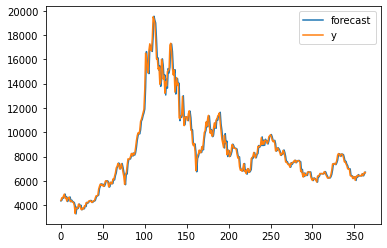

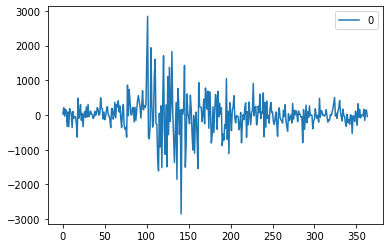

In [6]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫 번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 전차의 변동을 시각화합니다. (두 번쨰 그래프)
residuals.plot()

In [9]:
# forecast 결과는 순서대로 예측값, stderr, upper bound, lower bound 이다.
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤 예측합니다.
print(forecast_data)

(array([6676.71436156, 6684.62723878, 6689.67129041, 6696.51134292,
       6702.21612498]), array([ 512.41533904,  753.50594793,  914.98150845, 1061.45879447,
       1184.44557112]), array([[5672.39875192, 7681.0299712 ],
       [5207.7827187 , 8161.47175886],
       [4896.34048734, 8483.00209348],
       [4616.09033468, 8776.93235116],
       [4380.74546393, 9023.68678603]]))


In [10]:
# 테스트 데이터셋을 불러옵니다.
test_file_path = '../data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31) 
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

In [ ]:
plt.plot(%precision)